In [1]:
%matplotlib inline

# Data Analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading In the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

### Data Descriptions 

| Variable      | Definition    | Key     |
| :------------- | :----------: | -----------: |
|  **survival** |  Survival  |  0 = No, 1 = Yes   |
| **pclass**  | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd|
|  **sex** | Sex   |     |
|  **Age**  | Age in years |  |
|  **sibsp** |  # of siblings / spouses aboard the Titanic  |     |
|  **parch**  | # of parents / children aboard the Titanic |  |
|  **ticket** |  Ticket number  |     |
|  **fare**  | Passenger fare |  |
|  **cabin**  | Cabin Number |   |
|  **embarked**  | Port of Embarkation | C = Cherbourg, Q = Queenstown,S = Southampton |

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train)

891

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Datatype and info about train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
len(test)

418

In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Datatype and info about test dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
len(gender_submission)

418

## Missing Values

In [13]:
# Counting the no. of missing values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

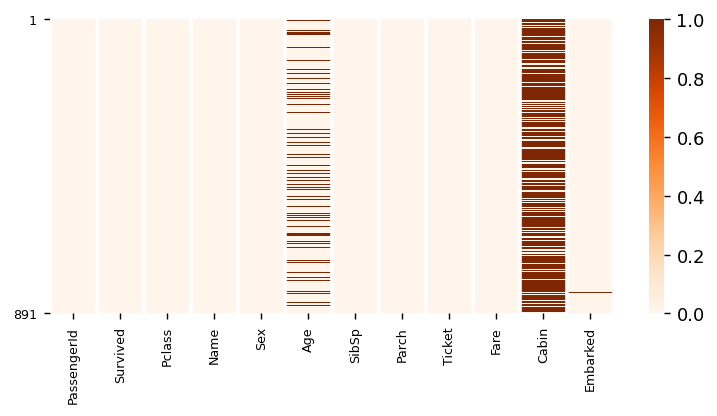

In [14]:
# Visualisng the missing values
plt.figure(figsize = (7,3), dpi = 130)
ax = sns.heatmap(train.isnull(), cmap = "Oranges")


tick = [train['PassengerId'].min(), train['PassengerId'].max()]
plt.yticks(tick,tick, fontsize = 7)
plt.xticks(fontsize = 7)

for i in range(train.shape[1]+1):
    ax.axvline(i, color='white', lw = 2)

plt.show()

We see that we are missing almost 20% data in Age column and almost 80% data in Cabin column. So its best to drop the cabin column later in our analysis or change it to "Cabin known or unknown".

## Univariate analysis

### Creating a function to create countplot

In [15]:
def plot_count(target_column, data, hue=None, palette=None, color=None, dpi=None, figsize=(6, 6)):
    plt.figure(figsize=figsize, dpi=dpi)
    sns.set_style('darkgrid')
    sns.countplot(x=target_column, data=data, hue=hue, palette=palette, color=color)
    plt.show()

## Feature : Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

### Of all the people in training set how many survived and how many died ?

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# How many people survived
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

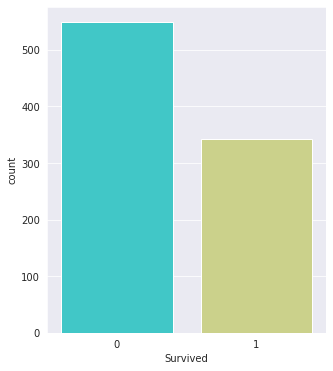

In [18]:
# Visualising how many people survived
plot_count("Survived", train, figsize=(5,6), palette="rainbow")

## Feature: Pclass

Description: The ticket class of the passenger.

Key: 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class

### How many passengers in each Pclass ?

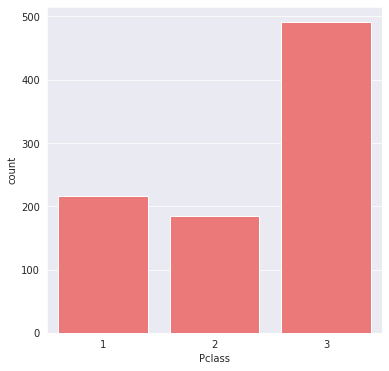

In [19]:
# Count the no. of passengers in different classes 
plot_count("Pclass", train, color="#ff6666")

We see that there were a lot of passengers who belonged to 3rd class

## Feature: Name

Description: The name of the passenger.

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train["Name"].value_counts()

Sage, Master. Thomas Henry                                             1
Albimona, Mr. Nassef Cassem                                            1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)                    1
Crosby, Capt. Edward Gifford                                           1
Zabour, Miss. Thamine                                                  1
                                                                      ..
Doling, Mrs. John T (Ada Julia Bone)                                   1
White, Mr. Richard Frasar                                              1
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")    1
Backstrom, Mr. Karl Alfred                                             1
Hagland, Mr. Konrad Mathias Reiersen                                   1
Name: Name, Length: 891, dtype: int64

We see that every name occurs uniquely.

What we can do is extract a different titles from the names and create a new column based on it

First we can see the different titles in the list

In [22]:
# Collecting different titles in the list
names = []
for name in train["Name"]:
    names.append(name.split(",")[1].split(".")[0].strip())
names = list(set(names))
print(names)

['Mrs', 'Mlle', 'the Countess', 'Mr', 'Miss', 'Mme', 'Col', 'Jonkheer', 'Dr', 'Sir', 'Master', 'Capt', 'Don', 'Major', 'Ms', 'Rev', 'Lady']


Now making column for the titles

In [23]:
train["Title"] = train.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())
test["Title"] = test.Name.apply(lambda name: name.split(",")[1].split(".")[0].strip())

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


So we can drop the name column in our prediction and replace it with Title column instead.

In [24]:
train["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
Jonkheer          1
Ms                1
Sir               1
Mme               1
Don               1
the Countess      1
Lady              1
Name: Title, dtype: int64

Additionaly we can also replace title with royalty based on the titles of people

## Feature: Sex

Description: The sex of the passenger (male or female)

In [25]:
# No. of males and females
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

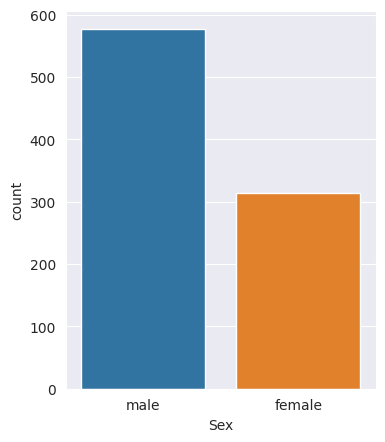

In [26]:
# Visualisng No of males and females
plot_count("Sex", train, figsize=(4,5), dpi=100)

## Feature: Age

Description: Tells age of passenger 

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
train.Age.isnull().sum()

177

We see that we have some missing values in age columns. So we cant do much here.
<br>
Checking correlation of survived and age column:-

In [29]:
print('Oldest Passenger was of:',train['Age'].max(),'Years')
print('Youngest Passenger was of:',train['Age'].min(),'Years')
print('Average Age on the ship:',train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [30]:
train["Survived"].corr(train["Age"])

-0.07722109457217768

We see that we have a negative correlation i.e. You have a higher chance of death if you were older. We can create a bin for the known ages and predict survival rates based on it or we can replace the missing ages by median of ages
<br>
<br>
For now we will bin the ages and create a new column based on it

In [31]:
# Binning the ages
bins = [0, 20, 40, 60, 100]
labels =[1, 2, 3, 4]

train["Age_Bin"] = pd.cut(train["Age"], bins=bins, labels=labels)
test["Age_Bin"] = pd.cut(test["Age"], bins=bins, labels=labels)

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [33]:
train.Age_Bin.value_counts()

2    385
1    179
3    128
4     22
Name: Age_Bin, dtype: int64

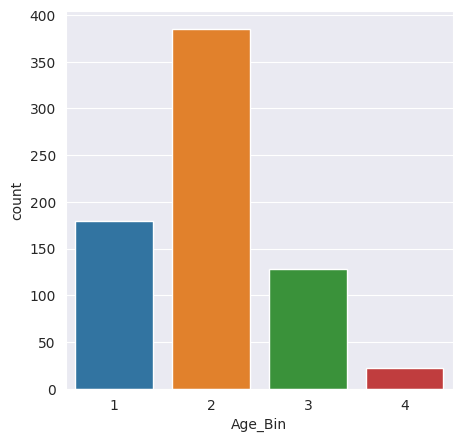

In [34]:
# Visualising Bin counts
plot_count("Age_Bin", train, dpi=100, figsize=(5,5))

## Features: SibSp and Parch

Description: SibSp - The number of siblings/spouses the passenger has aboard the Titanic.<br />
             Parch - The number of parents/children the passenger has aboard the Titanic.
<br>

Since both the features are similar we'll do a similar analysis.

In [35]:
# Checking for null values
train.Parch.isnull().sum()

0

In [36]:
train.SibSp.isnull().sum()

0

In [37]:
# Count of Parch and Sibsp
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

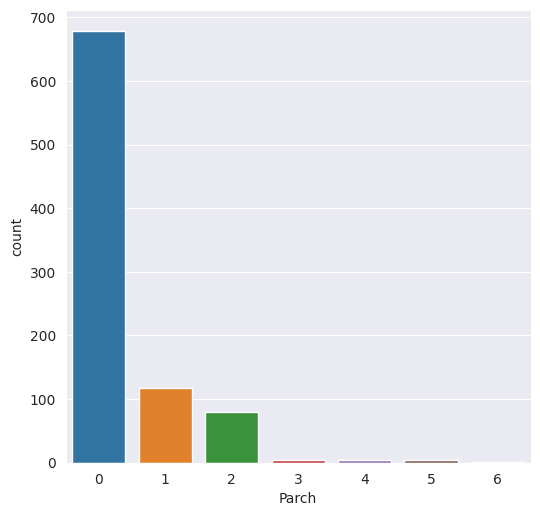

In [38]:
plot_count("Parch", train, dpi=100)

In [39]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

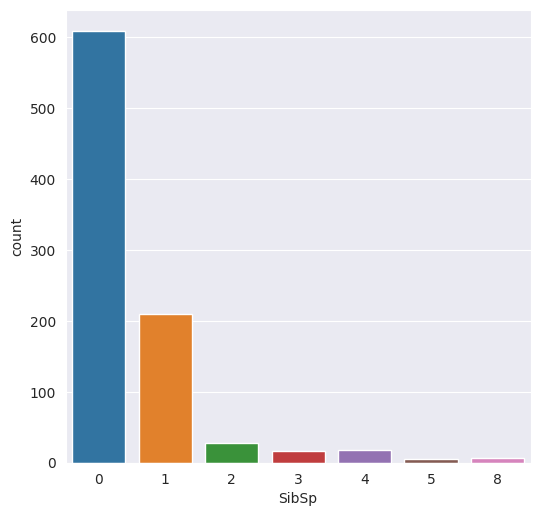

In [40]:
plot_count("SibSp", train, dpi=100)

Since both of them are similar we can make a new column out of the two columns named **"Alone"** where **0 = "Alone"** and **1 = "Not Alone"** 

In [41]:
# Add Alone column
train["Alone"] = 0
train.loc[(train.SibSp + train.Parch)>0, "Alone"] = 1

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0


In [43]:
test["Alone"] = 0
test.loc[(test.SibSp + test.Parch)>0, "Alone"] = 1

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,3,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,4,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,1


In [45]:
train.Alone.value_counts()

0    537
1    354
Name: Alone, dtype: int64

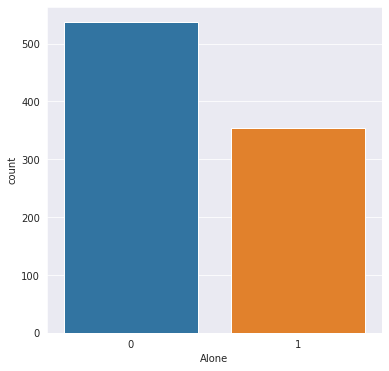

In [46]:
plot_count("Alone", train)

## Feature: Ticket

Description: The ticket number of the boarding passenger.

In [47]:
train.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
CA 2144     6
3101295     6
           ..
250643      1
349240      1
248723      1
349217      1
347062      1
Name: Ticket, Length: 681, dtype: int64

In [48]:
train.Ticket.nunique()

681

Since there are so many ticket values its best to drop them

## Feature: Fare

Description: How much the ticket cost.

In [49]:
train.Fare.nunique()

248

Like age we can bin the fares into a new column. 

In [50]:
# Binning the fares
fares = []
for fare_bin in pd.cut(train["Fare"], bins=4):
    fares.append(fare_bin)
fares = tuple(set(fares))
labels = (1,2,3,4)
fare_dict = dict(zip(fares, labels))

In [51]:
fare_dict

{Interval(256.165, 384.247, closed='right'): 1,
 Interval(128.082, 256.165, closed='right'): 2,
 Interval(-0.512, 128.082, closed='right'): 3,
 Interval(384.247, 512.329, closed='right'): 4}

In [52]:
# Creating a new binned fare column
train["Fare_Bin"] = pd.cut(train["Fare"], bins=4)
train["Fare_Bin"] = train.Fare_Bin.map(fare_dict)

test["Fare_Bin"] = pd.cut(test["Fare"], bins=4)
test["Fare_Bin"] = test.Fare_Bin.map(fare_dict)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [54]:
train.Fare_Bin.value_counts()

3    853
2     29
1      6
4      3
Name: Fare_Bin, dtype: int64

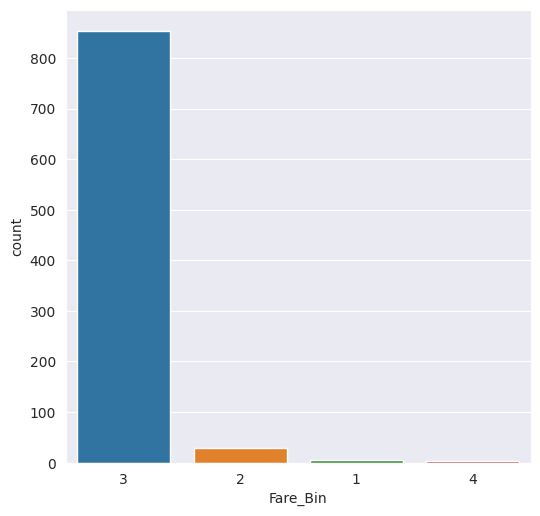

In [55]:
# Visualising binned fare column
plot_count("Fare_Bin", train, dpi=100)

## Feature: Cabin

Description: The cabin number where the passenger was staying.

In [56]:
train.Cabin.isnull().sum()

687

In [57]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
C54            1
E68            1
B102           1
B4             1
D15            1
Name: Cabin, Length: 147, dtype: int64

We see that we have a lot of NaN. So the best idea is to drop them. 
<br>
What we can also do is fill the missing values based on Pclass and Gender.
<br>
For now we will be dropping the column

## Feature: Embarked

Description: The port where the passenger boarded the Titanic.
<br>
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [58]:
train.Embarked.isnull().sum()

2

In [59]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

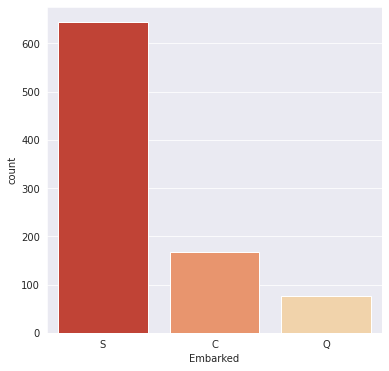

In [60]:
plot_count("Embarked", train, palette="OrRd_r")

For the two missing values we can drop those two rows.

## Correlation between each column
<br>
<br>
Before diving into Bivariate analysis lets plot the correlation between each column
<br>

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.
<br>

**NEGATIVE CORRELATION**: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation

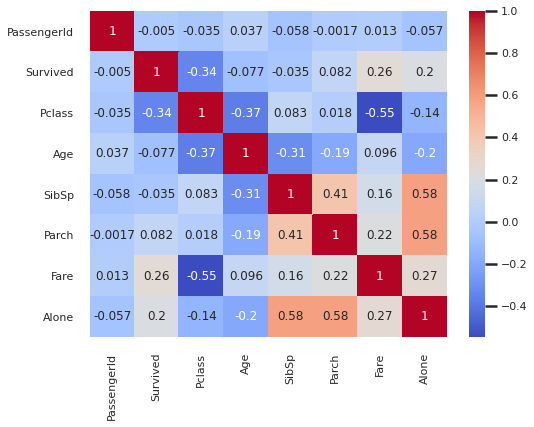

In [61]:
plt.figure(figsize=(8,6))
sns.set_context('poster', font_scale=0.5)
data=train.corr()
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.show()

## BiVariate Analysis

### Creating a function for plotting bar and catplot

In [62]:
def plot_bar_cat(x, y, data, hue=None, palette=None, color=None, dpi=None, figsize=(6, 6), kind="strip"):
    sns.set_style('darkgrid')
    f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=figsize)
    sns.barplot(x=x, y=y, data=data, hue=hue, palette=palette, color=color, ax=ax1)
    sns.pointplot(x=x, y=y, data=data, hue=hue, palette=palette, color=color, ax=ax2)
    plt.show()

### Relationship between Sex and Survived

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [64]:
# Total no. of men and women who survived or died 
train.groupby(["Sex"])["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [65]:
# Building a crosstab
pd.crosstab(index=train['Sex'], columns=train['Survived'], margins=True).style.background_gradient(cmap="GnBu")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


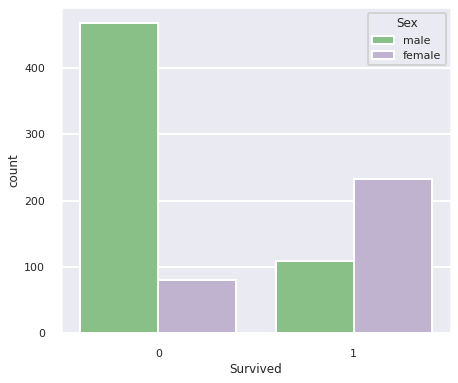

In [66]:
# Plotting how many male or female died or survived 
plot_count("Survived", train, hue = "Sex", palette="Accent", figsize=(7,6))

In [67]:
# Percentage of female and male survived vs dead
male_survive = (train.loc[(train["Sex"] == "male") & (train.Survived == 1)].Survived.count())/(train.loc[(train["Sex"] == "male")].Survived.count())
female_survive = (train.loc[(train["Sex"] == "female") & (train.Survived == 1)].Survived.count())/(train.loc[(train["Sex"] == "female")].Survived.count())

print(f"% male survived in the accident are: {male_survive}")
print(f"% female survived in the accident are: {female_survive}")

% male survived in the accident are: 0.18890814558058924
% female survived in the accident are: 0.7420382165605095


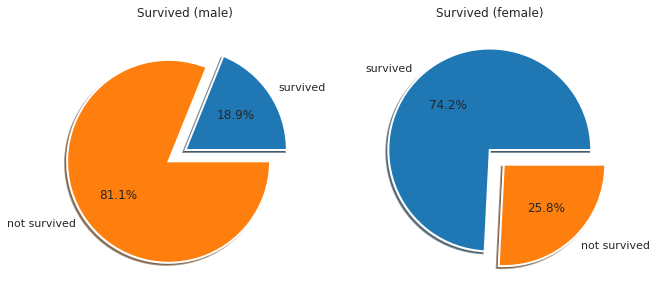

In [68]:
f, ax = plt.subplots(1, 2, figsize=(10, 9))
male_list = [male_survive, 1-male_survive]
female_list = [female_survive, 1-female_survive]

labels = ["survived", "not survived"]
explode = (0, .2)

ax[0].pie(male_list, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax[1].pie(female_list, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)


ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

We see that females are more likely to survive than males.
74% of women survive but only 19% of men survive in training set

### Relationship between PClass and Survived

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [70]:
# Total passengers who survived according to cabin class
train.groupby(["Survived", "Pclass"]).Survived.count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

In [71]:
# Building a crosstab
pd.crosstab(index=train['Pclass'], columns=train['Survived'], margins=True).style.background_gradient(cmap = "RdPu")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


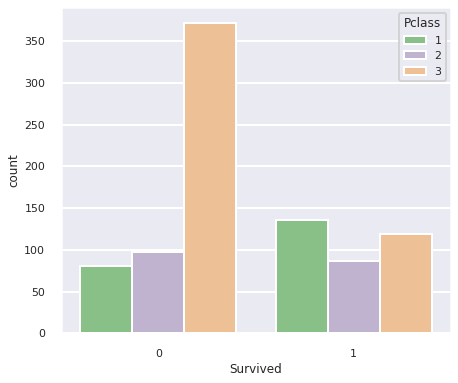

In [72]:
# Plotting the graph of Pclass vs Survived
plot_count("Survived", train, hue="Pclass", palette="Accent", figsize=(7,6))

In [73]:
# Percentage survived passengers according to Pclass
first_class = (train.loc[(train["Pclass"] == 1) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Pclass"] == 1)].Survived.count())
second_class = (train.loc[(train["Pclass"] == 2) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Pclass"] == 2)].Survived.count())
third_class = (train.loc[(train["Pclass"] == 3) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Pclass"] == 3)].Survived.count())

print("% Passengers survived in:-")
print(f"First class are: {first_class}")
print(f"Second class are: {second_class}")
print(f"Third class are: {third_class}")

% Passengers survived in:-
First class are: 0.6296296296296297
Second class are: 0.47282608695652173
Third class are: 0.24236252545824846


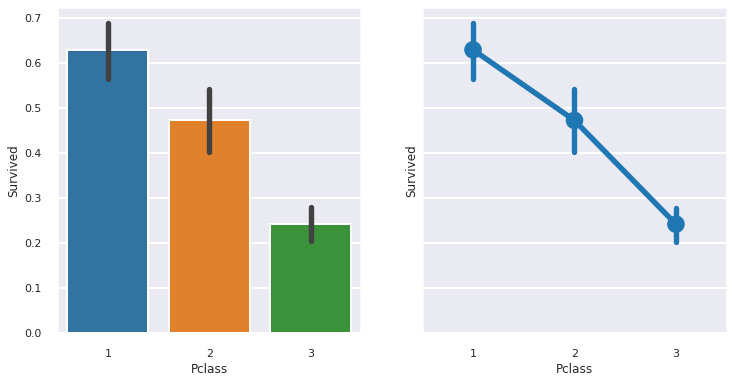

In [74]:
# Visualing percentage survived passengers
plot_bar_cat(x='Pclass',y='Survived',data=train, kind="point", figsize=(12,6))

We see that higher class passengers have higher rate of survival 

### Relationship between Embarked and Survived

In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [76]:
pd.crosstab(index=train.Embarked, columns=train.Survived, margins=True).style.background_gradient(cmap = "summer_r")

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


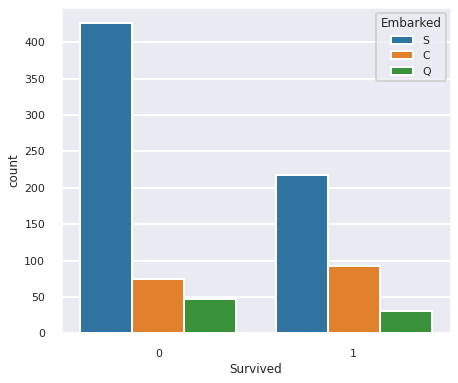

In [77]:
plot_count("Survived", train, hue="Embarked", figsize=(7,6))

In [78]:
# Percentage survived passengers according to Embarked
Southampton = (train.loc[(train["Embarked"] == "S") & (train.Survived == 1)].Survived.count())/(train.loc[(train["Embarked"] == "S")].Survived.count())
Cherbourg = (train.loc[(train["Embarked"] == "C") & (train.Survived == 1)].Survived.count())/(train.loc[(train["Embarked"] == "C")].Survived.count())
Queenstown = (train.loc[(train["Embarked"] == "Q") & (train.Survived == 1)].Survived.count())/(train.loc[(train["Embarked"] == "Q")].Survived.count())

print("% Passengers survived from:-")
print(f"Southampton are: {Southampton}")
print(f"Cherbourg are: {Cherbourg}")
print(f"Queenstown are: {Queenstown}")

% Passengers survived from:-
Southampton are: 0.33695652173913043
Cherbourg are: 0.5535714285714286
Queenstown are: 0.38961038961038963


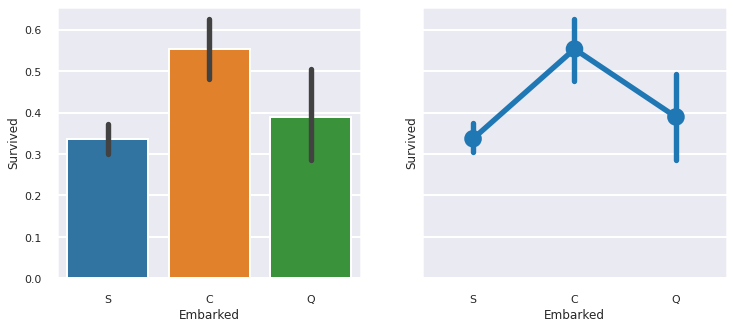

In [79]:
plot_bar_cat(x='Embarked',y='Survived',data=train, figsize=(12,5))

If you are from Cherbourg you have a higher chance of survival

### Relationship between Survived and Age_Bin

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [81]:
pd.crosstab(index=train.Age_Bin, columns=train.Survived, margins=True).style.background_gradient(cmap = "Blues")

Survived,0,1,All
Age_Bin,,,
1,97,82,179
2,232,153,385
3,78,50,128
4,17,5,22
All,424,290,714


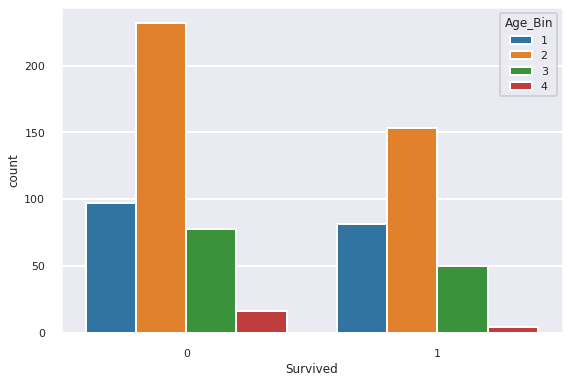

In [82]:
plot_count("Survived", train, hue="Age_Bin", figsize=(9,6))

In [83]:
Teens = (train.loc[(train["Age_Bin"] == 1) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Age_Bin"] == 1)].Survived.count())
Youth = (train.loc[(train["Age_Bin"] == 2) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Age_Bin"] == 2)].Survived.count())
Adult = (train.loc[(train["Age_Bin"] == 3) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Age_Bin"] == 3)].Survived.count())
Old = (train.loc[(train["Age_Bin"] == 4) & (train.Survived == 1)].Survived.count())/(train.loc[(train["Age_Bin"] == 4)].Survived.count())

print("% Out of survived passengers:-")
print(f"Teens were: {Teens}")
print(f"Youth were: {Youth}")
print(f"Adult are: {Adult}")
print(f"Old are: {Old}")

% Out of survived passengers:-
Teens were: 0.4581005586592179
Youth were: 0.3974025974025974
Adult are: 0.390625
Old are: 0.22727272727272727


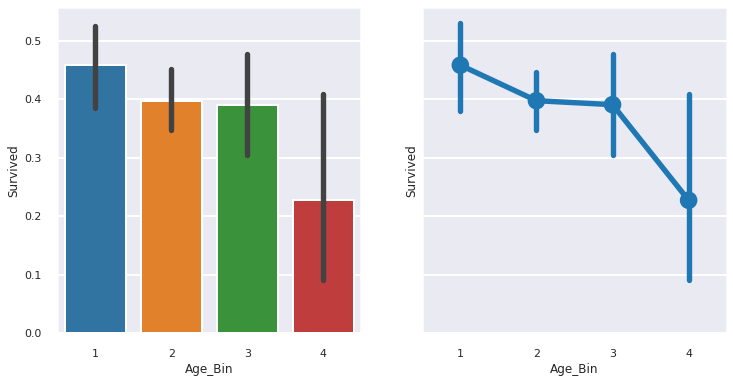

In [84]:
plot_bar_cat(x='Age_Bin',y='Survived',data=train, figsize=(12,6))

Elder people that is 60+ has the least possibility of survival

### Relationship between Survived and Alone

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [86]:
pd.crosstab(index=train.Alone, columns=train.Survived, margins=True).style.background_gradient(cmap = "OrRd")

Survived,0,1,All
Alone,,,
0,374,163,537
1,175,179,354
All,549,342,891


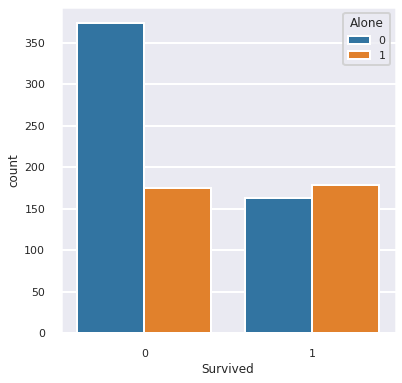

In [87]:
plot_count("Survived", train, hue="Alone", figsize=(6,6))

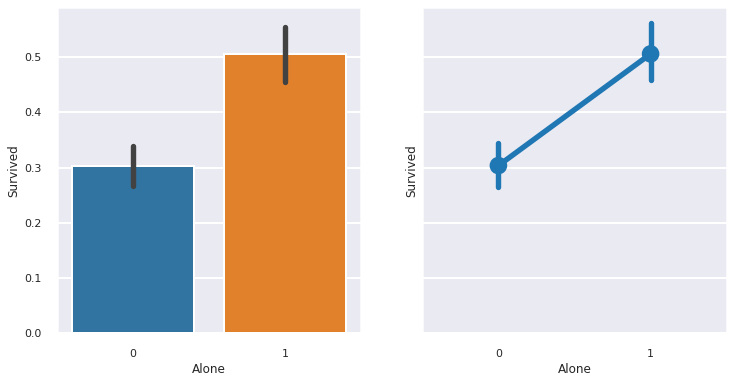

In [88]:
plot_bar_cat(x='Alone',y='Survived',data=train, figsize=(12,6))

We see that majority of people who were alone i.e. they didnt have either a sibling/spouse or parents died on titanic

## MultiVariate Analysis

### Relationship between Pclass, Sex and Survived

In [89]:
pd.crosstab(index=[train.Sex, train.Survived], columns=train.Pclass, margins=True).style.background_gradient(cmap="hot_r")

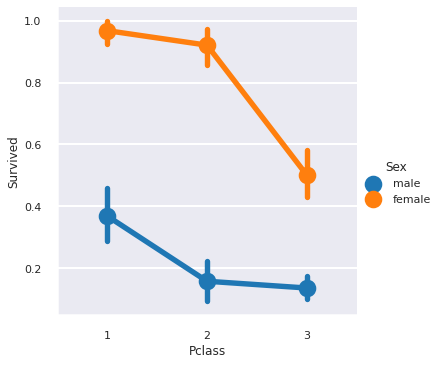

In [90]:
sns.catplot(x='Pclass', y='Survived',hue='Sex',data=train, kind="point")
plt.show()

We see that females who belonged to first class and second class had almost 100% chance of survival as only 3 out of 94 Women from Pclass1 and only 6 of 70 Pclass2 died. While among males first class males had the highest chances of survival.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.



### Relationship between Age/Age_Bin and Survived with Pclass and Sex

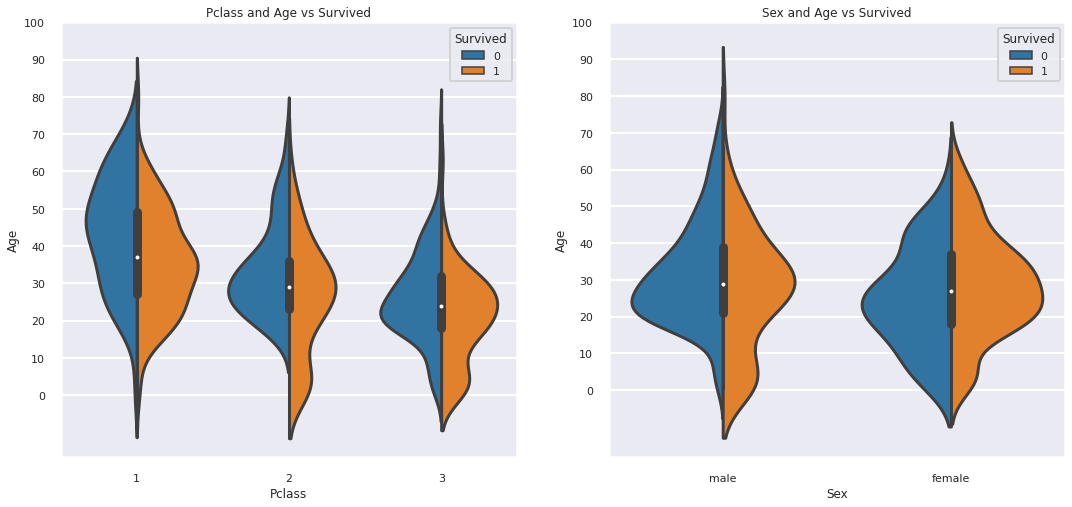

In [91]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations
<br>

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
<br>

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
<br>

3)For males, the survival chances decreases with an increase in age.

In [92]:
pd.crosstab(index=[train.Sex, train.Survived], columns=train.Age_Bin, margins=True).style.background_gradient(cmap="pink_r")

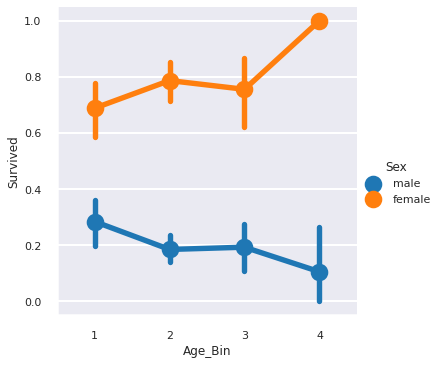

In [93]:
sns.catplot(x='Age_Bin', y='Survived',hue='Sex',data=train, kind="point")
plt.show()

We see that all the females who were above 60 i.e. 3 out of 22 survived while majority of males, i.e. 17 out of 22 who were above 60 died.
<br>

Same goes with males who were above 20 and 40. Majority of the people died. Only men between who were below 20 had a higher chance of survival

In [94]:
pd.crosstab(index=[train.Pclass, train.Survived], columns=train.Age_Bin, margins=True).style.background_gradient(cmap="BuGn")

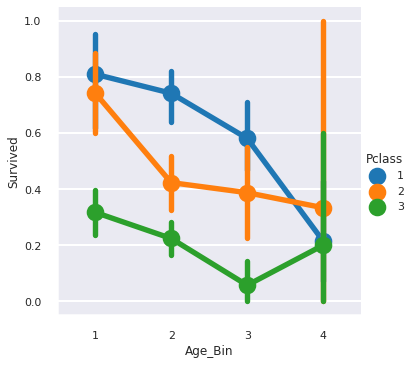

In [95]:
sns.catplot(x='Age_Bin', y='Survived',hue='Pclass',data=train, kind="point")
plt.show()

We see that people who were above 60 despite being in the first class (11 out of 22) died.
Majority of the people that died and were below 20 belonged to Third class

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


In [97]:
pd.crosstab(index=[train.Pclass, train.Sex, train.Survived], columns=train.Age_Bin, margins=True).style.background_gradient(cmap="pink_r")

* We see here that majority males who died were between the age 20-40 and belonged to the third class 
* We also observe that all the passengers who were above 60 and belonged to third class died and only one out from first class and second class survived
* All the females who were in second class and were of age below 20 survived 

### Relationship between Alone and Survived with Age and Pclass

In [98]:
pd.crosstab(index=[train.Sex, train.Survived], columns=train.Alone, margins=True).style.background_gradient(cmap="BuPu")

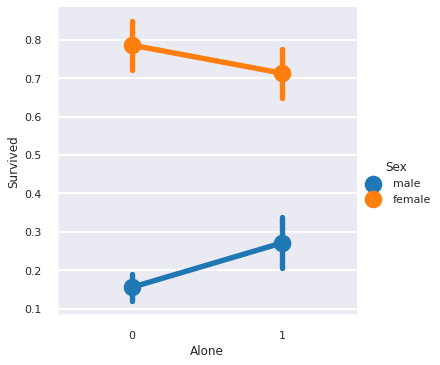

In [99]:
sns.catplot(x='Alone', y='Survived',hue='Sex',data=train, kind="point")
plt.show()

We see that males who were alone had a very low chance of survival

In [100]:
pd.crosstab(index=[train.Pclass, train.Survived], columns=train.Alone, margins=True).style.background_gradient(cmap="PuBu")

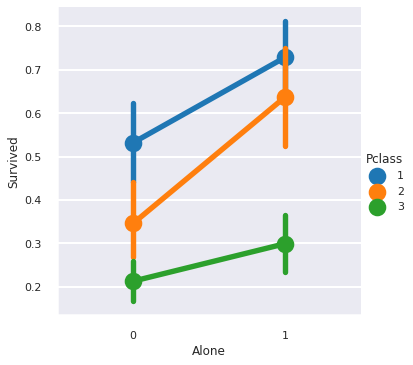

In [101]:
sns.catplot(x='Alone', y='Survived',hue='Pclass',data=train, kind="point")
plt.show()

In [102]:
pd.crosstab(index=[train.Pclass, train.Survived], columns=[train.Alone, train.Sex], margins=True).style.background_gradient(cmap="PuBu")

Majority of the males were alone and belonged to third class.

### Relationship between Embarked and Survived with Pclass and Sex

In [103]:
pd.crosstab([train.Embarked, train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

<Figure size 2160x432 with 0 Axes>

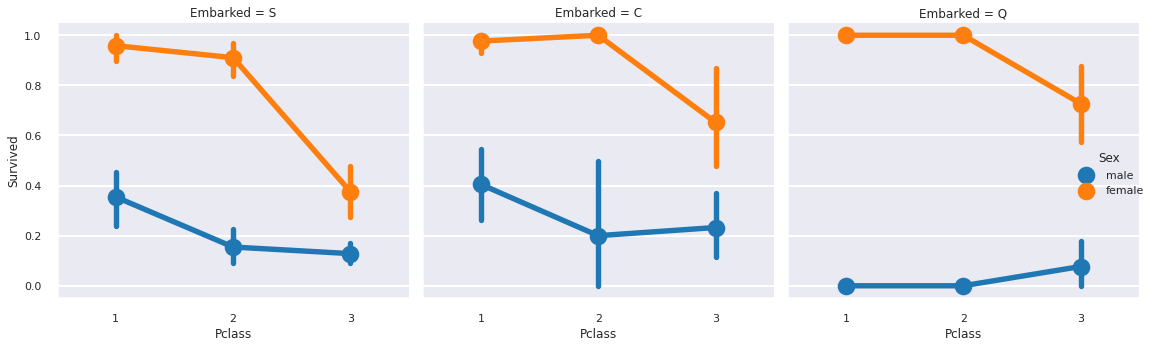

In [104]:
plt.figure(figsize=(30,6))
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=train, kind="point")
plt.tight_layout()
plt.show()

* We can see that men from all ports S, C, Q who were alone and belongeed to third class had the maximum chance of dying.
* Rate of survival of women belonging to Pclass 1 and Pclass 2 is 1 regardless of the port they embarked from

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Alone,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,3


### Relationship between Fare_Bin, Pclass and Survived

In [106]:
pd.crosstab([train.Survived, train.Pclass], train.Fare_Bin, margins=True).style.background_gradient(cmap='Blues')

In [107]:
fare_dict

{Interval(256.165, 384.247, closed='right'): 1,
 Interval(128.082, 256.165, closed='right'): 2,
 Interval(-0.512, 128.082, closed='right'): 3,
 Interval(384.247, 512.329, closed='right'): 4}

We see that 372 passengers died and all of then belonged to 3rd class

#### Observations in a Nutshell for all features:
* **Sex**: The chance of survival for women is high as compared to men.

* **Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

* **Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

* **Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

* **Parch+SibSp**: Having someone with you be it a sibling/spouse or parent gave u a higher chance of survival than when you were travelling alone.